In [1]:
# For Google Colab use commands installing packages
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Install Pennylane and Pylatexenc in Google Colab
if IN_COLAB:
  !pip install pennylane pennylane-qiskit
  !pip install pylatexenc #for using MPL

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.9/245.9 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from IPython.display import display
import pennylane as qml
import numpy as np
import random
import math

### 1번. Quantum Coin

In [ ]:
# quantum coin
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def Q_coin_1():
    qml.Hadamard(0)
    return qml.expval(qml.PauliZ(0))


# Hadamard gate transform qubit 0 into Hafamard state which is distributied 0, 1
print(Q_coin_1())
# Q_coin_1's output is 0
# PauliZ's eigenvalue is 1 or -1 so that  qml.expval(qml.PauliZ(0)) means 0 and 1 state is equally distributed

0.0


In [ ]:
dev = qml.device("default.qubit", wires=1)


# 4 side Q-coin
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def Q_coin_2():
    qml.Hadamard(0)
    qml.Hadamard(1)
    return qml.probs()


print(Q_coin_2())

[0.25 0.25 0.25 0.25]


### Lets's Make Class!!

In [ ]:
class Q_Game:
  def __init__(self, num_cases = 4, num_boxes = 16, check = False):
    '''
      ## Initialize for instances of this class ##
      num_cases(int) : power of 2, number of possible cases of Coins(Dice)
      num_boxes(int) : number of boxes in board, (n * n)
    '''
    self.num_boxes = math.ceil(np.log2(num_boxes)) # 16 -> 4, 32 -> 5
    self.wires_boxes = list(range(self.num_boxes))

    self.num_dice = math.ceil(np.log2(num_cases)) # 4 -> 2, 16 -> 4
    self.wires_dice = list(range(self.num_boxes, self.num_boxes + self.num_dice))

    if check:
      print('num_boxes : {}, wires_boxes : {}'.format(self.num_boxes, self.wires_boxes))
      print('num_dice : {}, wires_dice : {}'.format(self.num_dice, self.wires_dice))

    self.dev = qml.device("default.qubit", wires=2)
    #self.circuit = QuantumCircuit(self.num_of_possible + self.num_of_box, self.num_of_possible + self.num_of_box)


In [ ]:
game_1 = Q_Game(4, 16, Tr)

### 2번

In [ ]:
# task 2
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def Q_coin_2(num):
    bits = [int(x) for x in np.binary_repr(num, width=4)]
    print(num, bits)
    qml.BasisStatePreparation(bits, wires=[0,1,2,3])
    return qml.probs()

print(Q_coin_2(0))
# output ( num = 10 )
# [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], 1의 index : 10

0 [0, 0, 0, 0]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 3번

In [7]:
# task 3
dev = qml.device("default.qubit", wires=6)

@qml.qnode(dev)
def shift():
    # 주사위 (4,5)
    qml.Hadamard(4)
    qml.Hadamard(5)

    # 논리 회로들 (0,1,2,3)
    # 1칸
    qml.CNOT([5,3])
    qml.MultiControlledX([3,5],[2],'01')
    qml.MultiControlledX([2,3,5],[1],'001')
    qml.MultiControlledX([1,2,3,5],[0],'0001')

    qml.CNOT([4,2])
    qml.MultiControlledX([2,4],[1],'01')
    qml.MultiControlledX([1,2,4],[0],'001')
    return qml.probs([0,1,2,3])

#one_roll = shift()
#print(shift())


@qml.qnode(dev)
def shift_n(num):
    for i in range(num):
        qml.Hadamard(4)
        qml.Hadamard(5)

        qml.CNOT([5,3])
        qml.MultiControlledX([3,5],[2],'01')
        qml.MultiControlledX([2,3,5],[1],'001')
        qml.MultiControlledX([1,2,3,5],[0],'0001')

        qml.CNOT([4,2])
        qml.MultiControlledX([2,4],[1],'01')
        qml.MultiControlledX([1,2,4],[0],'001')
    return qml.probs([0,1,2,3])

n_roll = shift_n(3)
print(n_roll)


# 위치를 나타내는 4개의 큐비트
# 주사위를 굴리는 추가적인 큐비트
# 주사위를 돌리고나서 위치 상태 반환 및 주사위 상태 초기화 후 다시 돌리기

[0.015625 0.078125 0.03125  0.46875  0.15625  0.09375  0.03125  0.09375
 0.015625 0.015625 0.       0.       0.       0.       0.       0.      ]


/usr/local/lib/python3.10/dist-packages/pennylane/ops/qubit/non_parametric_ops.py:2095: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


### 4번

[0.00097656 0.01660156 0.02050781 0.27050781 0.10644531 0.11035156
 0.12207031 0.10253906 0.00097656 0.14160156 0.01269531 0.04394531
 0.04394531 0.00097656 0.00488281 0.00097656]
16


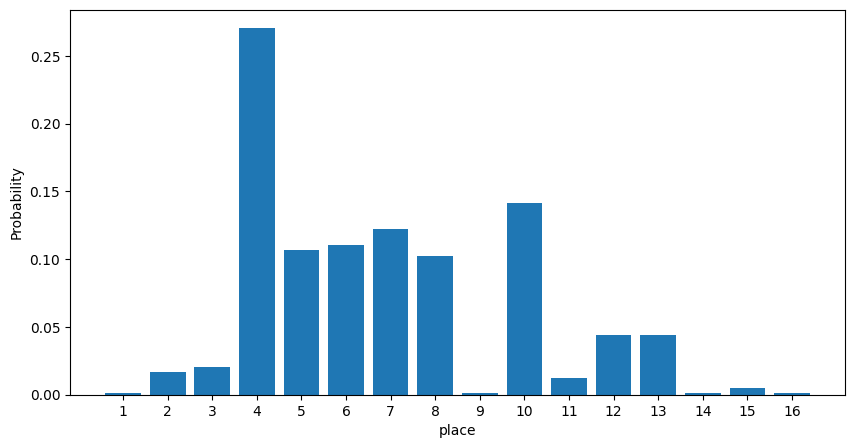

None

In [ ]:
# Task 4
import numpy as np

aa = np.eye(16)
aa[2][2]=0; aa[9][9]=0; aa[8][8]=0; aa[12][12]=0
aa[2][9]=1; aa[9][2]=1; aa[8][12]=1; aa[12][8]=1

@qml.qnode(dev)
def shift_n_T4(num):


    for i in range(num):
        qml.Hadamard(4)
        qml.Hadamard(5)

        qml.CNOT([5,3])
        qml.MultiControlledX([3,5],[2],'01')
        qml.MultiControlledX([2,3,5],[1],'001')
        qml.MultiControlledX([1,2,3,5],[0],'0001')

        qml.CNOT([4,2])
        qml.MultiControlledX([2,4],[1],'01')
        qml.MultiControlledX([1,2,4],[0],'001')

        # 사다리
        qml.QubitUnitary(aa,[0,1,2,3])

    return qml.probs([0,1,2,3])

import matplotlib.pyplot as plt

def print_bar(result):
    bits_num = int(np.log2(len(result)))
    bits_list= [i for i in range(1,17)]
    x = np.arange(len(result))

    plt.figure(figsize=(10, 5))
    plt.bar(x, result,width=0.8)
    plt.xticks(x, bits_list)
    plt.xlabel('place', fontsize=10)
    plt.ylabel('Probability', fontsize=10)




@qml.qnode(dev)
def shift_n_T4(num):

    for i in range(num):
        qml.Hadamard(4)
        qml.Hadamard(5)

        qml.CNOT([5,3])
        qml.MultiControlledX([3,5],[2],'01')
        qml.MultiControlledX([2,3,5],[1],'001')
        qml.MultiControlledX([1,2,3,5],[0],'0001')

        qml.CNOT([4,2])
        qml.MultiControlledX([2,4],[1],'01')
        qml.MultiControlledX([1,2,4],[0],'001')


        # 사다리
        qml.QubitUnitary(aa,[0,1,2,3])

    return qml.probs([0,1,2,3])

# x =shift_n_T4(5)
# print(x)


# print(n_roll)
n_roll = shift_n(5)
print(n_roll)
print(len(n_roll))
print_bar(n_roll)
# n_roll = shift_n(4)
# print_bar(n_roll)
# n_roll = shift_n(5)
# print_bar(n_roll)
# print_bar(one_roll)
# print_bar(x)
# plt.show()
# qml.draw_mpl(shift_n_T4, show_all_wires = True)(2)
display(plt.show())